In [1]:
from visualizer.main import Visualizer

In [2]:
def triangulation_reader(number):
    points, triangles = [], []
    with open('test' + number + 'points', 'r') as file:
        lines = file.readlines()
        for line in lines:
            line = line.split(' ')
            x = float(line[0])
            y = float(line[1])
            points.append((x,y))
    with open('test' + number + 'triangles', 'r') as file:
        lines = file.readlines()
        for line in lines:
            line = line.split(' ')
            id1 = int(line[0])
            id2 = int(line[1])
            id3 = int(line[2])
            triangles.append((id1,id2,id3))
    return points,triangles

In [3]:
def triangles_to_segments(points,triangles):
    segments = []
    for ind1,ind2,ind3 in triangles:
        segments.append((points[ind1],points[ind2]))
        segments.append((points[ind1],points[ind3]))
        segments.append((points[ind2],points[ind3]))
    return segments

[(0.0, 0.0), (1.0, 0.0), (2.0, 0.0), (0.0, 1.0), (1.0, 1.0), (2.0, 1.0), (0.0, 2.0), (1.0, 2.0), (2.0, 2.0)]
[(0, 1, 3), (1, 4, 3), (1, 2, 4), (2, 5, 4), (3, 4, 6), (4, 7, 6), (4, 5, 7), (5, 8, 7)]


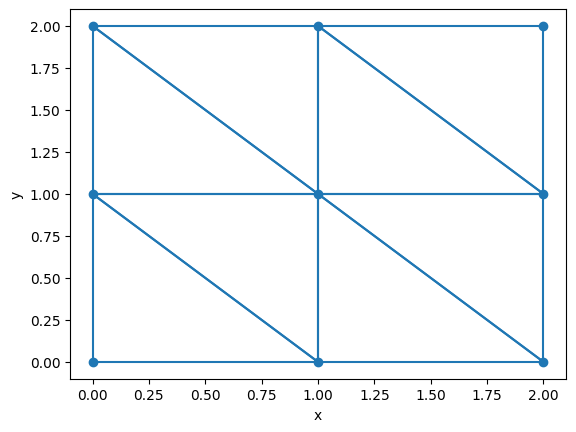

In [4]:
p,t = triangulation_reader('1')
vis = Visualizer()
vis.add_point(p)
s = triangles_to_segments(p,t)
vis.add_line_segment(s)
vis.show()
print(p)
print(t)

Lista wierzchołków + Lista połączeń

In [5]:
def triangles_to_connections(triangles):
    connections = []
    for i,ii,iii in triangles:
        connections.append((i,ii))
        connections.append((i,iii))
        connections.append((ii,iii))
    return connections

In [6]:
con = triangles_to_connections(t)
vertex_and_connections = (p,con)

Half Edge 

In [9]:
from halfedge import *

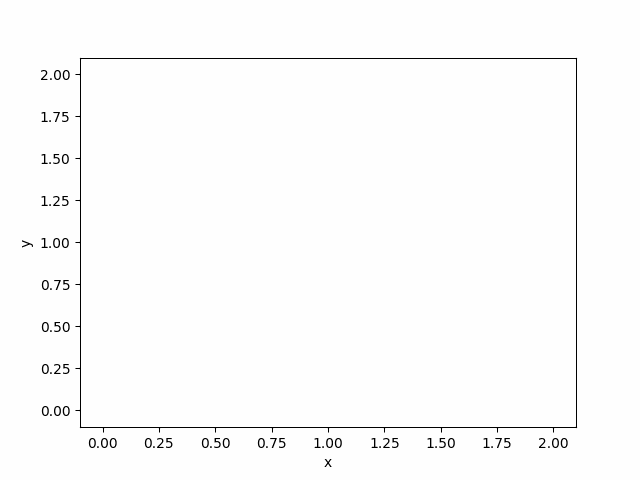

In [14]:
he = create_half_edge_structure(p,t)
vis = Visualizer()
i = 0
j = 0
c = ['red','blue','green','orange','purple','black']
for haed in he:
    vis.add_line_segment((haed.vertex.cords,haed.next.vertex.cords),color=c[j])
    i += 1
    j = (i // 3) % 5
vis.show_gif()